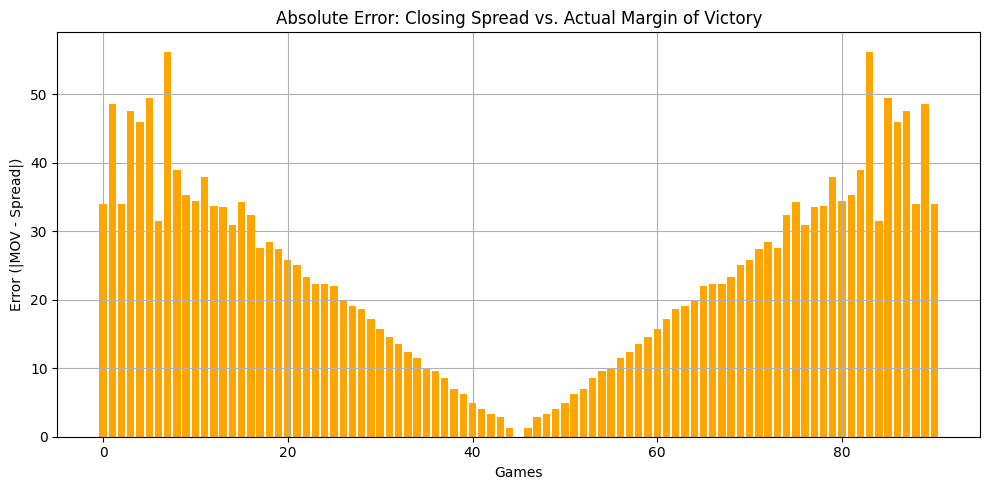

   Closing_Spread  Average_MOV  Spread_Error
0            23.0       -11.00         34.00
1            22.5       -26.00         48.50
2            22.0       -12.00         34.00
3            21.5       -26.00         47.50
4            21.0       -25.00         46.00
5            20.5       -29.00         49.50
6            20.0       -11.50         31.50
7            19.5       -36.71         56.21
8            19.0       -20.00         39.00
9            18.5       -16.75         35.25


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your real data files
team_stats = pd.read_csv('/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv')  # Replace with your actual file path
spread_data = pd.read_csv('/workspaces/Data-Science-Final-Project/NBA/data/all_team_cps_oddh.csv')  # Replace with your actual file path

# Step 2: Clean and align team stats
team_stats = team_stats[['Year', 'TEAM', 'NetRtg']]  # Only keeping necessary columns for now

# Step 3: Clean and prepare spread file
spread_data = spread_data[['Closing_Spread', 'Average_MOV']]
spread_data = spread_data.dropna()  # Drop missing MOV or Spread rows
spread_data['Spread_Error'] = (spread_data['Average_MOV'] - spread_data['Closing_Spread']).abs()

# Step 4: Plotting the spread vs. actual MOV error
plt.figure(figsize=(10, 5))
plt.bar(range(len(spread_data)), spread_data['Spread_Error'], color='orange')
plt.title('Absolute Error: Closing Spread vs. Actual Margin of Victory')
plt.xlabel('Games')
plt.ylabel('Error (|MOV - Spread|)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print summary
print(spread_data[['Closing_Spread', 'Average_MOV', 'Spread_Error']].head(10))


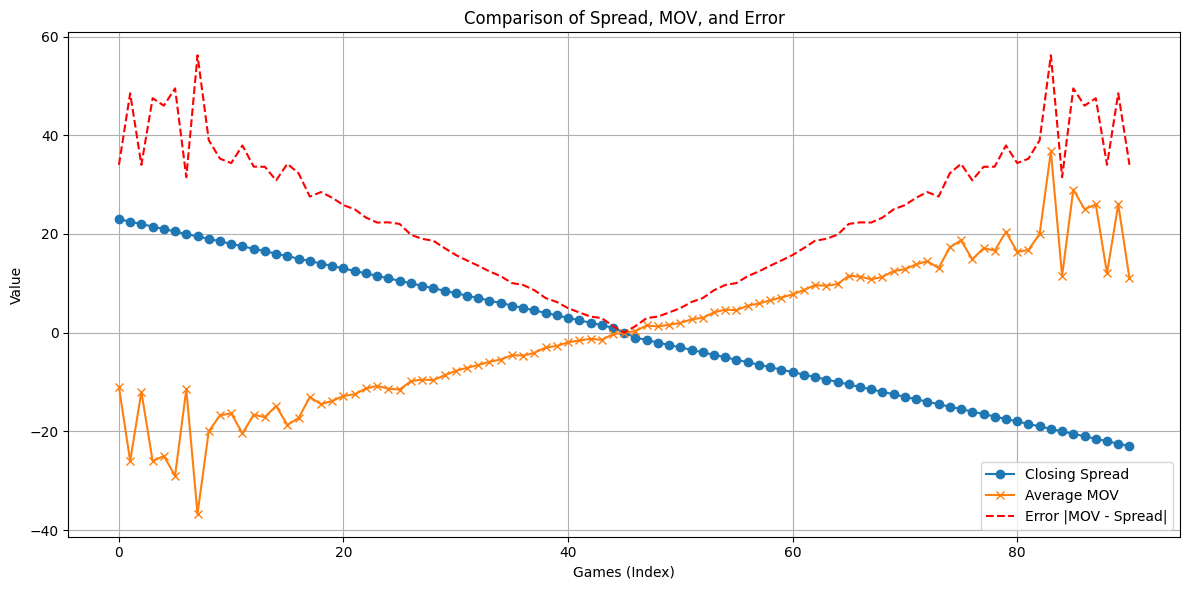

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(spread_data['Closing_Spread'], label='Closing Spread', marker='o')
plt.plot(spread_data['Average_MOV'], label='Average MOV', marker='x')
plt.plot(spread_data['Spread_Error'], label='Error |MOV - Spread|', linestyle='--', color='red')

plt.title('Comparison of Spread, MOV, and Error')
plt.xlabel('Games (Index)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


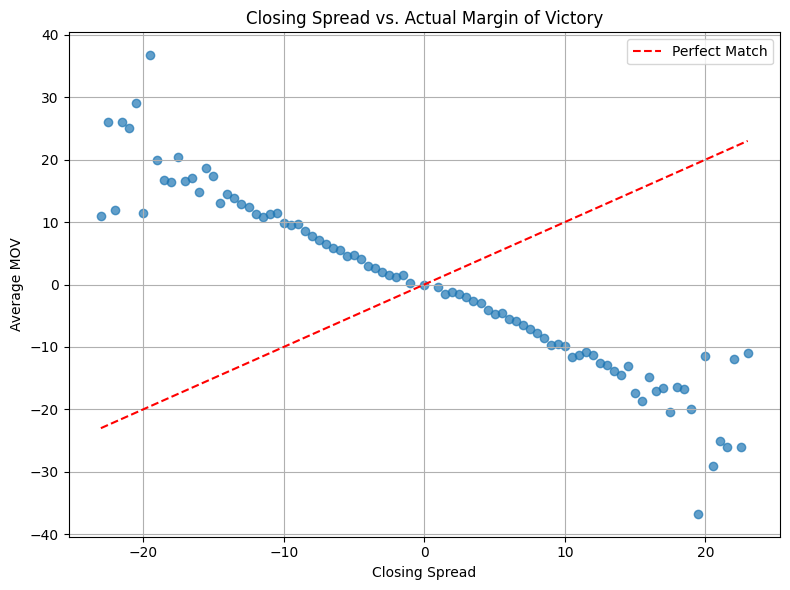

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(spread_data['Closing_Spread'], spread_data['Average_MOV'], alpha=0.7)
plt.plot([spread_data['Closing_Spread'].min(), spread_data['Closing_Spread'].max()],
         [spread_data['Closing_Spread'].min(), spread_data['Closing_Spread'].max()],
         color='red', linestyle='--', label='Perfect Match')

plt.xlabel('Closing Spread')
plt.ylabel('Average MOV')
plt.title('Closing Spread vs. Actual Margin of Victory')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
